# Stats701 Homework 6, Winter 2018
### Mengyi Yuan
#### wendymy@umich.edu

### Problem 1: Warmup: plotting CLTs
Problem 1 took me 90 minutes.

In [2]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


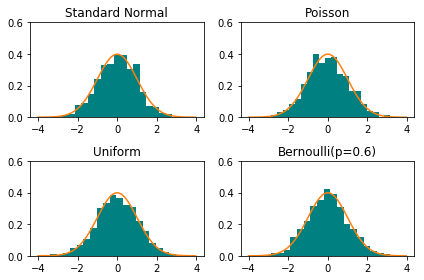

In [97]:
# 1.1 - 1.3
# plot the histograms of 4 distributions with N = 30
N = 1000

plt.subplot(221)
plt.title("Standard Normal")
S1 = [np.sqrt(N)*np.mean(np.random.normal(0,1,N)) for _ in range(1000)]
(n,bins,patches) = plt.hist(S1, 20, normed=1, facecolor='teal')
x_axis = np.arange(-4,4,0.04)
plt.plot(x_axis,norm.pdf(x_axis,0,1))

plt.subplot(222)
plt.title("Poisson")
S2 = [np.sqrt(N)*np.mean(np.random.poisson(1,N)-1) for _ in range(1000)]
(n,bins,patches) = plt.hist(S2, 20, normed=1, facecolor='teal')
x_axis = np.arange(-4,4,0.04)
plt.plot(x_axis,norm.pdf(x_axis,0,1))

plt.subplot(223)
plt.title("Uniform")
S3 = [np.sqrt(N)*(np.mean(np.sqrt(12)*(np.random.uniform(0,1,N)-1/2))) for _ in range(1000)]
(n,bins,patches) = plt.hist(S3, 20, normed=1, facecolor='teal')
x_axis = np.arange(-4,4,0.04)
plt.plot(x_axis,norm.pdf(x_axis,0,1))

plt.subplot(224)
plt.title("Bernoulli(p=0.6)")
p = 0.6
S3 = [np.sqrt(N)*(np.mean((np.random.binomial(1,p,N)-p)/np.sqrt(p*(1-p)))) for _ in range(1000)]
(n,bins,patches) = plt.hist(S3, 20, normed=1, facecolor='teal')
x_axis = np.arange(-4,4,0.04)
plt.plot(x_axis,norm.pdf(x_axis,0,1))

for subplt in range(221,225):
    plt.subplot(subplt)
    plt.ylim([0,0.6])

_ = plt.tight_layout()

1.4 

All four of the plots do not look equally normal. When n is 20, Standard Normal and Uniform distributions seem more towards normal than the Poisson distribution and Binomial do. I tried several different values of n, as n gets larger, Poisson distribution and Binomial distribution became more toward normal. So the distribution of $X_i$ has an effect on how quickly $\sqrt{n}(S_n-\mu)$ starts to look normal. Poisson distribution and Binomial distribution converge slower than the Standard Normal distribution and the Uniform Distribution. 

### Problem 2: Plotting a Mixture of Normals
Problem 2 took me 120 minutes.

In [26]:
# 2.1
points = np.loadtxt("points.dlm")
labels = np.load("labels.npy")

(0, 1)

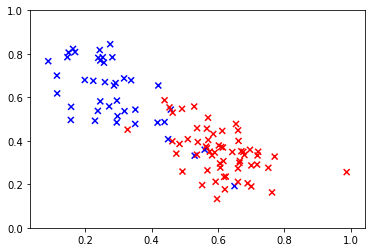

In [27]:
# 2.2
colors = ['blue','red']
plt.scatter(points[:,0], points[:,1],marker='x',c=labels, cmap=mp.colors.ListedColormap(colors))
plt.ylim([0,1])

In [28]:
# 2.3
mu0 = np.array([0.2,0.7])
Sigma0 = np.array([[0.015, -0.011],[-0.011,0.018]])
mvn0 = scipy.stats.multivariate_normal(mu0,Sigma0)

mu1 = np.array([0.65,0.3])
Sigma1 = np.array([[0.016, -0.011],[-0.011,0.016]])
mvn1 = scipy.stats.multivariate_normal(mu1,Sigma1)

In [29]:
# to calculate the levels
from scipy.stats import chi2

T1 = chi2.ppf(0.68, 2)
T2 = chi2.ppf(0.95, 2)
level01 = np.exp(-T1/2)/(2*np.pi*np.sqrt(np.linalg.det(Sigma0)))
level02 = np.exp(-T2/2)/(2*np.pi*np.sqrt(np.linalg.det(Sigma0)))

level11 = np.exp(-T1/2)/(2*np.pi*np.sqrt(np.linalg.det(Sigma1)))
level12 = np.exp(-T2/2)/(2*np.pi*np.sqrt(np.linalg.det(Sigma1)))

(0, 1)

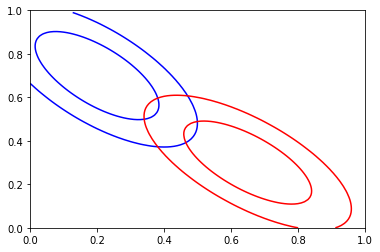

In [30]:
x,y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.empty(x.shape + (2,))
pos[:,:,0] = x; pos[:,:,1] = y

_ = plt.contour(x,y,mvn0.pdf(pos),levels=[level02,level01], colors='blue')
_ = plt.contour(x,y,mvn1.pdf(pos),levels=[level12,level11], colors='red')
plt.ylim([0,1]); plt.xlim([0,1])

Text(1.2,0.5,'outliers')

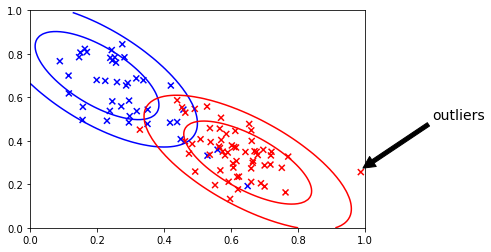

In [102]:
# 2.4
_ = plt.scatter(points[:,0], points[:,1],marker='x',c=labels, cmap=mp.colors.ListedColormap(colors))
_ = plt.contour(x,y,mvn0.pdf(pos),levels=[level02,level01], colors='blue')
_ = plt.contour(x,y,mvn1.pdf(pos),levels=[level12,level11], colors='red')
plt.ylim([0,1]); plt.xlim([0,1])
plt.annotate('outliers', xy=(0.99, 0.27), xytext=(1.2,0.5),
                fontsize=14, arrowprops=dict(facecolor='black', shrink=0.02))

The data appears normal since most of the points are within the 2 standard deviation contour lines, which enclose probability mass 0.95 of the distribution. The obvious outlier is indicated by the arrow in the graph above.

### Problem 3: Conway's Game of Life
Problem 3 took me 120 minutes.

In [53]:
# 3.1
def is_valid_board(nparray):
    if not isinstance(nparray, numpy.ndarray): return False
    if nparray.ndim != 2: return False
    for element in nparray:
        for i in element:
            if not(i ==0.0 or i ==1.0):
                return False
    return True

In [74]:
# 3.2
def gol_step(nparray):
    if not is_valid_board(nparray): raise TypeError("Invalid Game of Life board.")
    
    n = nparray.shape[0]
    new = np.copy(nparray)
    
    for i in range(n):
        for j in range(n):
            neighbors = nparray[((i-1)%n,(i-1)%n,i,(i+1)%n,(i+1)%n,(i+1)%n,i,(i-1)%n),
                                (j,(j+1)%n,(j+1)%n,(j+1)%n,j,(j-1)%n,(j-1)%n,(j-1)%n)]
            
            if nparray[i,j] == 1:
                if sum(neighbors==1) < 2 or sum(neighbors==1) > 3:
                    new[i,j] = 0
            else:
                if sum(neighbors==1) == 3:
                    new[i,j] = 1
    return(new)

In [99]:
# 3.3
def draw_gol_board(nparray):
    plt.xticks([]) ; plt.yticks([])
    _ = plt.imshow(nparray,cmap=plt.get_cmap('binary'))

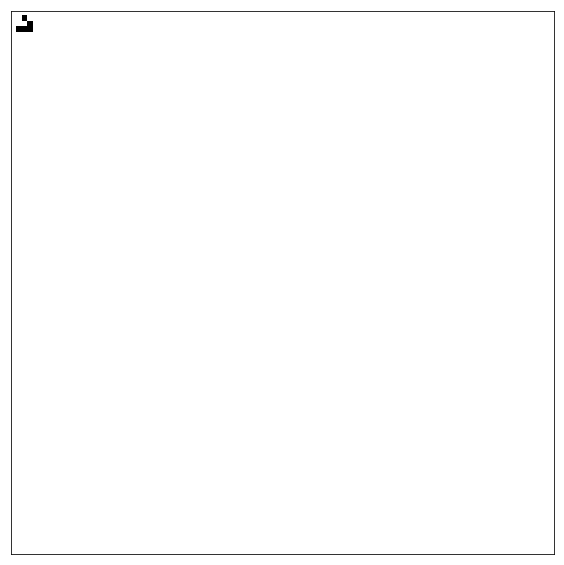

In [101]:
# 3.4
gol = np.zeros((100,100))
gol[(1,2,3,3,3),(2,3,1,2,3)] = 1
plt.figure(figsize=(10,10))
draw_gol_board(gol)

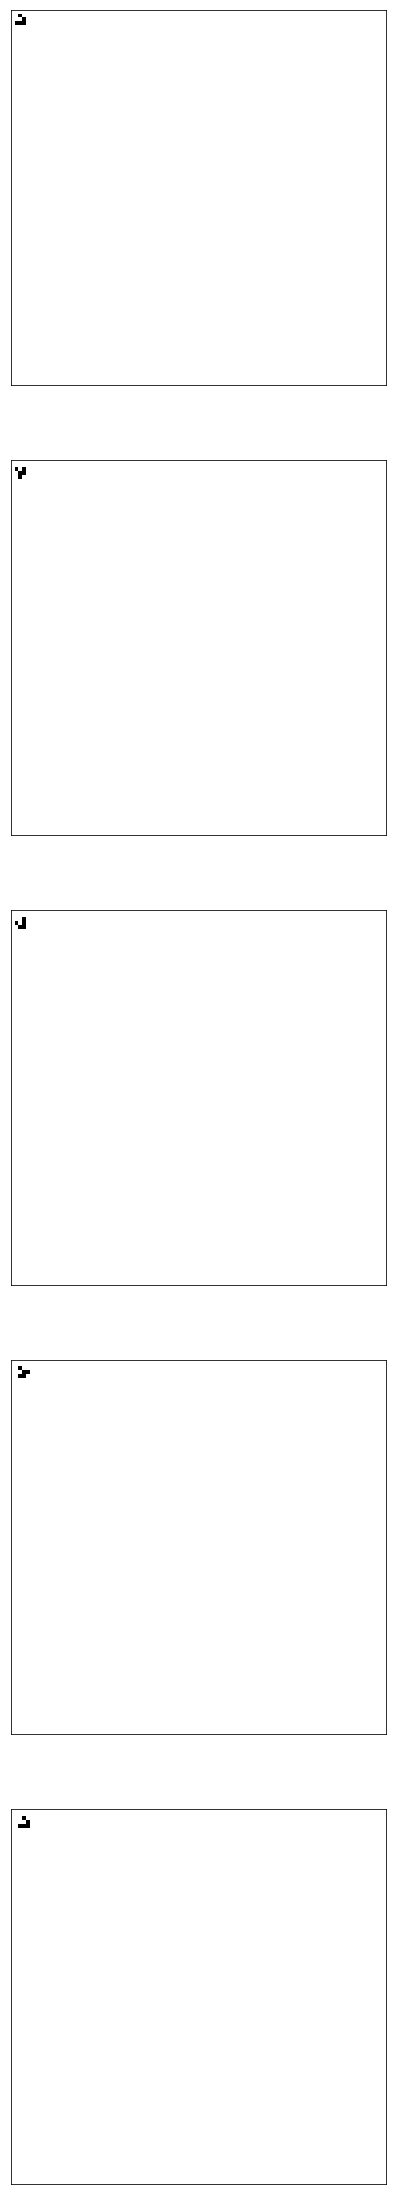

In [77]:
# 3.5
gol2 = gol_step(gol)
gol3 = gol_step(gol2)
gol4 = gol_step(gol3)
gol5 = gol_step(gol4)

plt.figure(figsize=(40,40))
plt.subplot(511)
draw_gol_board(gol)
plt.subplot(512)
draw_gol_board(gol2)
plt.subplot(513)
draw_gol_board(gol3)
plt.subplot(514)
draw_gol_board(gol4)
plt.subplot(515)
draw_gol_board(gol5)

In [64]:
# Animation
import matplotlib.animation as animation

def gol_anime(gol, steps):
    n = gol.shape[0]

    def update(data):
        nonlocal gol
        
        new = np.copy(gol)
        
        for i in range(n):
            for j in range(n):
                neighbors = gol[((i-1)%n,(i-1)%n,i,(i+1)%n,(i+1)%n,(i+1)%n,i,(i-1)%n),
                                    (j,(j+1)%n,(j+1)%n,(j+1)%n,j,(j-1)%n,(j-1)%n,(j-1)%n)]

                if gol[i,j] == 1:
                    if sum(neighbors==1) < 2 or sum(neighbors==1) > 3:
                        new[i,j] = 0
                else:
                    if sum(neighbors==1) == 3:
                        new[i,j] = 1
        #update data
        mat.set_data(new)
        gol = new

        return [mat]
    
    fig, ax = plt.subplots()
    mat = ax.matshow(gol)
    ani = animation.FuncAnimation(fig, update, frames=range(steps), interval=50,
                              save_count=50, repeat = False)
    plt.show()